# Case de estudos: Dados sobre o atraso de voos nos Estados Unidos


In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('nyflights.csv')

In [3]:
display(df)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


## Data Preparation

Primeiramente retiramos as colunas que não tem valor para o modelo, como a coluna Unnamed: 0, que não possui informações novas e a coluna year, que apresenta apenas um valor (2013).<br>

Podemos investigar sobre a remoção das colunas flight e tailnum também, visto que são apenas para identificar os voos. <br>

Se o avião sai adiantado, o dep_delay fica negativo (saiu antes do horário marcado)

In [3]:
df = df.drop(columns=['Unnamed: 0', 'year', 'flight', 'tailnum'])

In [7]:
df.isnull().sum()

month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [9]:
#Preenchemos todos os valores nulos com as médias das colunas, o que pode não ser o melhor método
df['dep_time'].fillna(df['dep_time'].mean(), inplace=True)
df['dep_delay'].fillna(df['dep_delay'].mean(), inplace=True)
df['arr_time'].fillna(df['arr_time'].mean(), inplace=True)
df['arr_delay'].fillna(df['arr_delay'].mean(), inplace=True)
df['air_time'].fillna(df['air_time'].mean(), inplace=True)

In [11]:
df.isnull().sum()

month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [12]:
display(df)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,origin,dest,air_time,distance,hour,minute,time_hour
0,1,1,517.000000,515,2.00000,830.000000,819,11.000000,UA,EWR,IAH,227.00000,1400,5,15,2013-01-01 05:00:00
1,1,1,533.000000,529,4.00000,850.000000,830,20.000000,UA,LGA,IAH,227.00000,1416,5,29,2013-01-01 05:00:00
2,1,1,542.000000,540,2.00000,923.000000,850,33.000000,AA,JFK,MIA,160.00000,1089,5,40,2013-01-01 05:00:00
3,1,1,544.000000,545,-1.00000,1004.000000,1022,-18.000000,B6,JFK,BQN,183.00000,1576,5,45,2013-01-01 05:00:00
4,1,1,554.000000,600,-6.00000,812.000000,837,-25.000000,DL,LGA,ATL,116.00000,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9,30,1349.109947,1455,12.63907,1502.054999,1634,6.895377,9E,JFK,DCA,150.68646,213,14,55,2013-09-30 14:00:00
336772,9,30,1349.109947,2200,12.63907,1502.054999,2312,6.895377,9E,LGA,SYR,150.68646,198,22,0,2013-09-30 22:00:00
336773,9,30,1349.109947,1210,12.63907,1502.054999,1330,6.895377,MQ,LGA,BNA,150.68646,764,12,10,2013-09-30 12:00:00
336774,9,30,1349.109947,1159,12.63907,1502.054999,1344,6.895377,MQ,LGA,CLE,150.68646,419,11,59,2013-09-30 11:00:00


### Gráfico de histograma para o atraso na partida

<AxesSubplot:xlabel='dep_delay', ylabel='Count'>

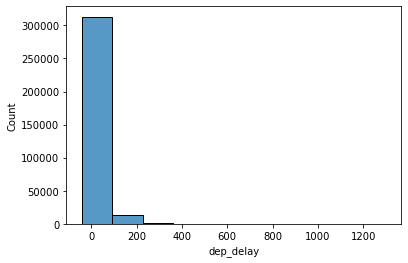

In [6]:
sns.histplot(data=df, x='dep_delay', bins=10)

In [5]:
df['avg_speed(mph)'] = (df['distance'] / df['air_time']) * 60

In [8]:
display(df)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,avg_speed(mph)
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,370.044053
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,374.273128
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,408.375000
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,516.721311
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,394.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,NaN
336772,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,NaN
336773,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,NaN
336774,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,NaN


### Filtrar atrasos maiores que duas horas

In [30]:
df['atraso_partida'] = df['dep_delay'] > 120
df.groupby('dest')['atraso_partida'].sum().sort_values(ascending=False)[:5]
#df.groupby('dest')['avg_speed(mph)'].mean().sort_values(ascending=False)[:5]
sns.barplot()

dest
ORD    4975
ATL    4687
LAX    4442
MCO    4083
SFO    4078
Name: atraso_partida, dtype: int64

In [5]:
list(df['dest'].value_counts().head().index)

['ORD', 'ATL', 'LAX', 'BOS', 'MCO']

<AxesSubplot:>

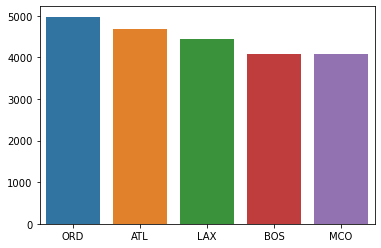

In [6]:
x = ['ORD', 'ATL', 'LAX', 'BOS', 'MCO']
y = [4975,4687,4442,4083,4078]
sns.barplot(x=x, y=y)

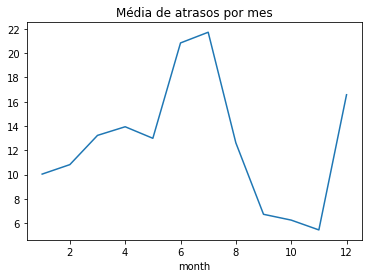

In [42]:
plt.title('Média de atrasos por mes')
df.groupby('month')['dep_delay'].mean().plot()
plt.show()

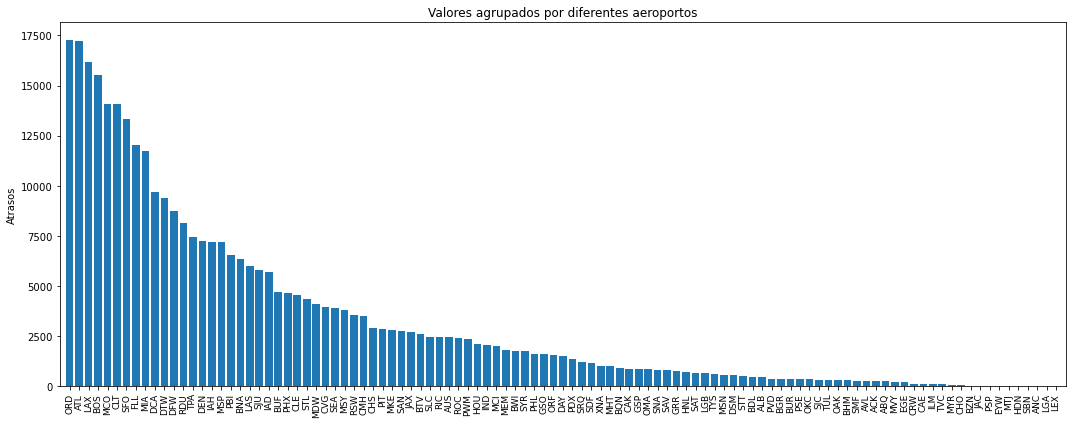

In [4]:
fig = plt.figure(figsize=(15,6))

plt.bar(df['dest'].value_counts().index, df['dest'].value_counts().values)

plt.title('Valores agrupados por diferentes aeroportos')
plt.xticks(rotation=90, fontsize=9)
plt.xlim([-1,df['dest'].nunique()])

plt.ylabel('Atrasos')

plt.tight_layout()
plt.show()